## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# King County Housing Guide

## Overview
A real estate firm has contacted us for advice on how to fairly value homes in King County so that they may offer their clients fair recommendations when it comes to buying and selling homes. A data file containing various details about the various homes in King County has been provided to us. We want to be able to break down the aspects that eventually increase the value of their homes.
## Business Understanding
We'll be looking to answer the following questions to help us better understand the layout of the housing industry.

* How does number of bathrooms/bedrooms effect the price?
* How much does square footage matter?
* Are there any other features that effect the price significantly?

## Data Understanding
King County House Data: a dataset that we were provided at the onset of the project. This file contains data for 21,597 homes built in King County from 1900 to 2015. Each home in the set contains information regarding features such as number of bedrooms/bathrooms, number of floors, square footage, zip code, condition, and more.  

### Loading and Cleaning the Data

The first step is to import and clean all of the data so that we have a data set suitable for linear regression.

In [1]:
#importing all different libraries that we'll use for our analysis.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from matplotlib.ticker import FuncFormatter
from sklearn.dummy import DummyClassifier
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [3]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

There are NaN/null values in the waterfront, view, and yr_renovated columns. We must consider how to handle these columns because our model will not execute with any null values.

For the time being, we are converting all Nulls to the '0', 'NO', or 'NONE' of their respective columns because they are overwhelmingly the most common value, and we believe this is a safe assumption.

In [4]:

df['waterfront'] = df['waterfront'].fillna('NO')
df['yr_renovated'].fillna(0.0, inplace=True)
df['view'].fillna('NONE', inplace=True)

In [5]:
# We simply convert the yes or no values to 1 and 0 respectively.
waterfront = preprocessing.LabelEncoder()
x1 = list(df['waterfront'])


waterfront.fit(x1)
waterfront_list = waterfront.transform(x1)
df['waterfront'] = waterfront_list
df['waterfront'].value_counts()


# 0 is NO WATERFRONT
# 1 is YES WATERFRONT

0    21451
1      146
Name: waterfront, dtype: int64

In [6]:
# Take apart the date column, put it in to three columns as day month and year and have the values numeric.
df['date'] = pd.to_datetime(df['date'])
df['day_sold'] = df['date'].map(lambda x: x.day)
df['month_sold'] = df['date'].map(lambda x: x.month)
df['year_sold'] = df['date'].map(lambda x: x.year)
df.drop('date', axis=1, inplace=True)

In [7]:
## Creating numerical values from categorical data.

df.view.replace({'NONE': 0, 'AVERAGE': 2, 'FAIR': 1, 'GOOD': 3, 'EXCELLENT': 4}, inplace=True)

df.condition.replace({'Poor': 1, 'Average': 3, 'Fair': 2, 'Good': 4, 'Very Good': 5}, inplace=True)

df.grade.replace({'7 Average': 7, '8 Good': 8, '9 Better': 9, '6 Low Average': 6, '10 Very Good': 10,
                       '11 Excellent': 11, '5 Fair': 5, '12 Luxury': 12, '13 Mansion': 13, '3 Poor': 3,
                        '4 Low': 4}, inplace=True)

In [8]:
# Convert all the ? values to 0.0 like we did for the other columns.
# Then convert the values from strings to int

df['sqft_basement'] = df["sqft_basement"].replace({"?": '0.0'})
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  float64
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

We now have a data collection that exclusively contains numeric data, which is an important step towards preparing for linear regression. It's time to run this data through various models to see if we can forecast the price based on particular housing qualities.

## Baseline Model

We'll start by building a baseline model with all of the relevant data and the average house price. This is a fantastic starting point against which to compare our future models.



In [13]:
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=100)
baseline = DummyRegressor()
baseline.fit(X_train, y_train)
baseline.score(X_test, y_test)
error = baseline.predict(X_test)-y_test
sq_of_err=(error)**2
mean_sqr_of_errors=sq_of_err.mean()
sqr_mean_sqr_errors= np.sqrt(mean_sqr_of_errors)


print("Our R-squared on the testing set is:", baseline.score(X_test, y_test))
print('This is the RMSE:', sqr_mean_sqr_errors)


Our R-squared on the testing set is: -0.0002252015545449737
This is the RMSE: 390385.8702981889


We can see that our baseline score, which is based on consistently estimating the average price, is very low.
Let's begin by attempting to create meaningful predictions using Linear regression on all of the data. Our RMSE, which is critical for this project given our pricing forecast.


### Constructing a simple model

It's important to start with a simple model of only two variables, with the independent variable chosen based on its correlation to the dependent variable, price. We may visualise this information by creating a correlation heatmap.

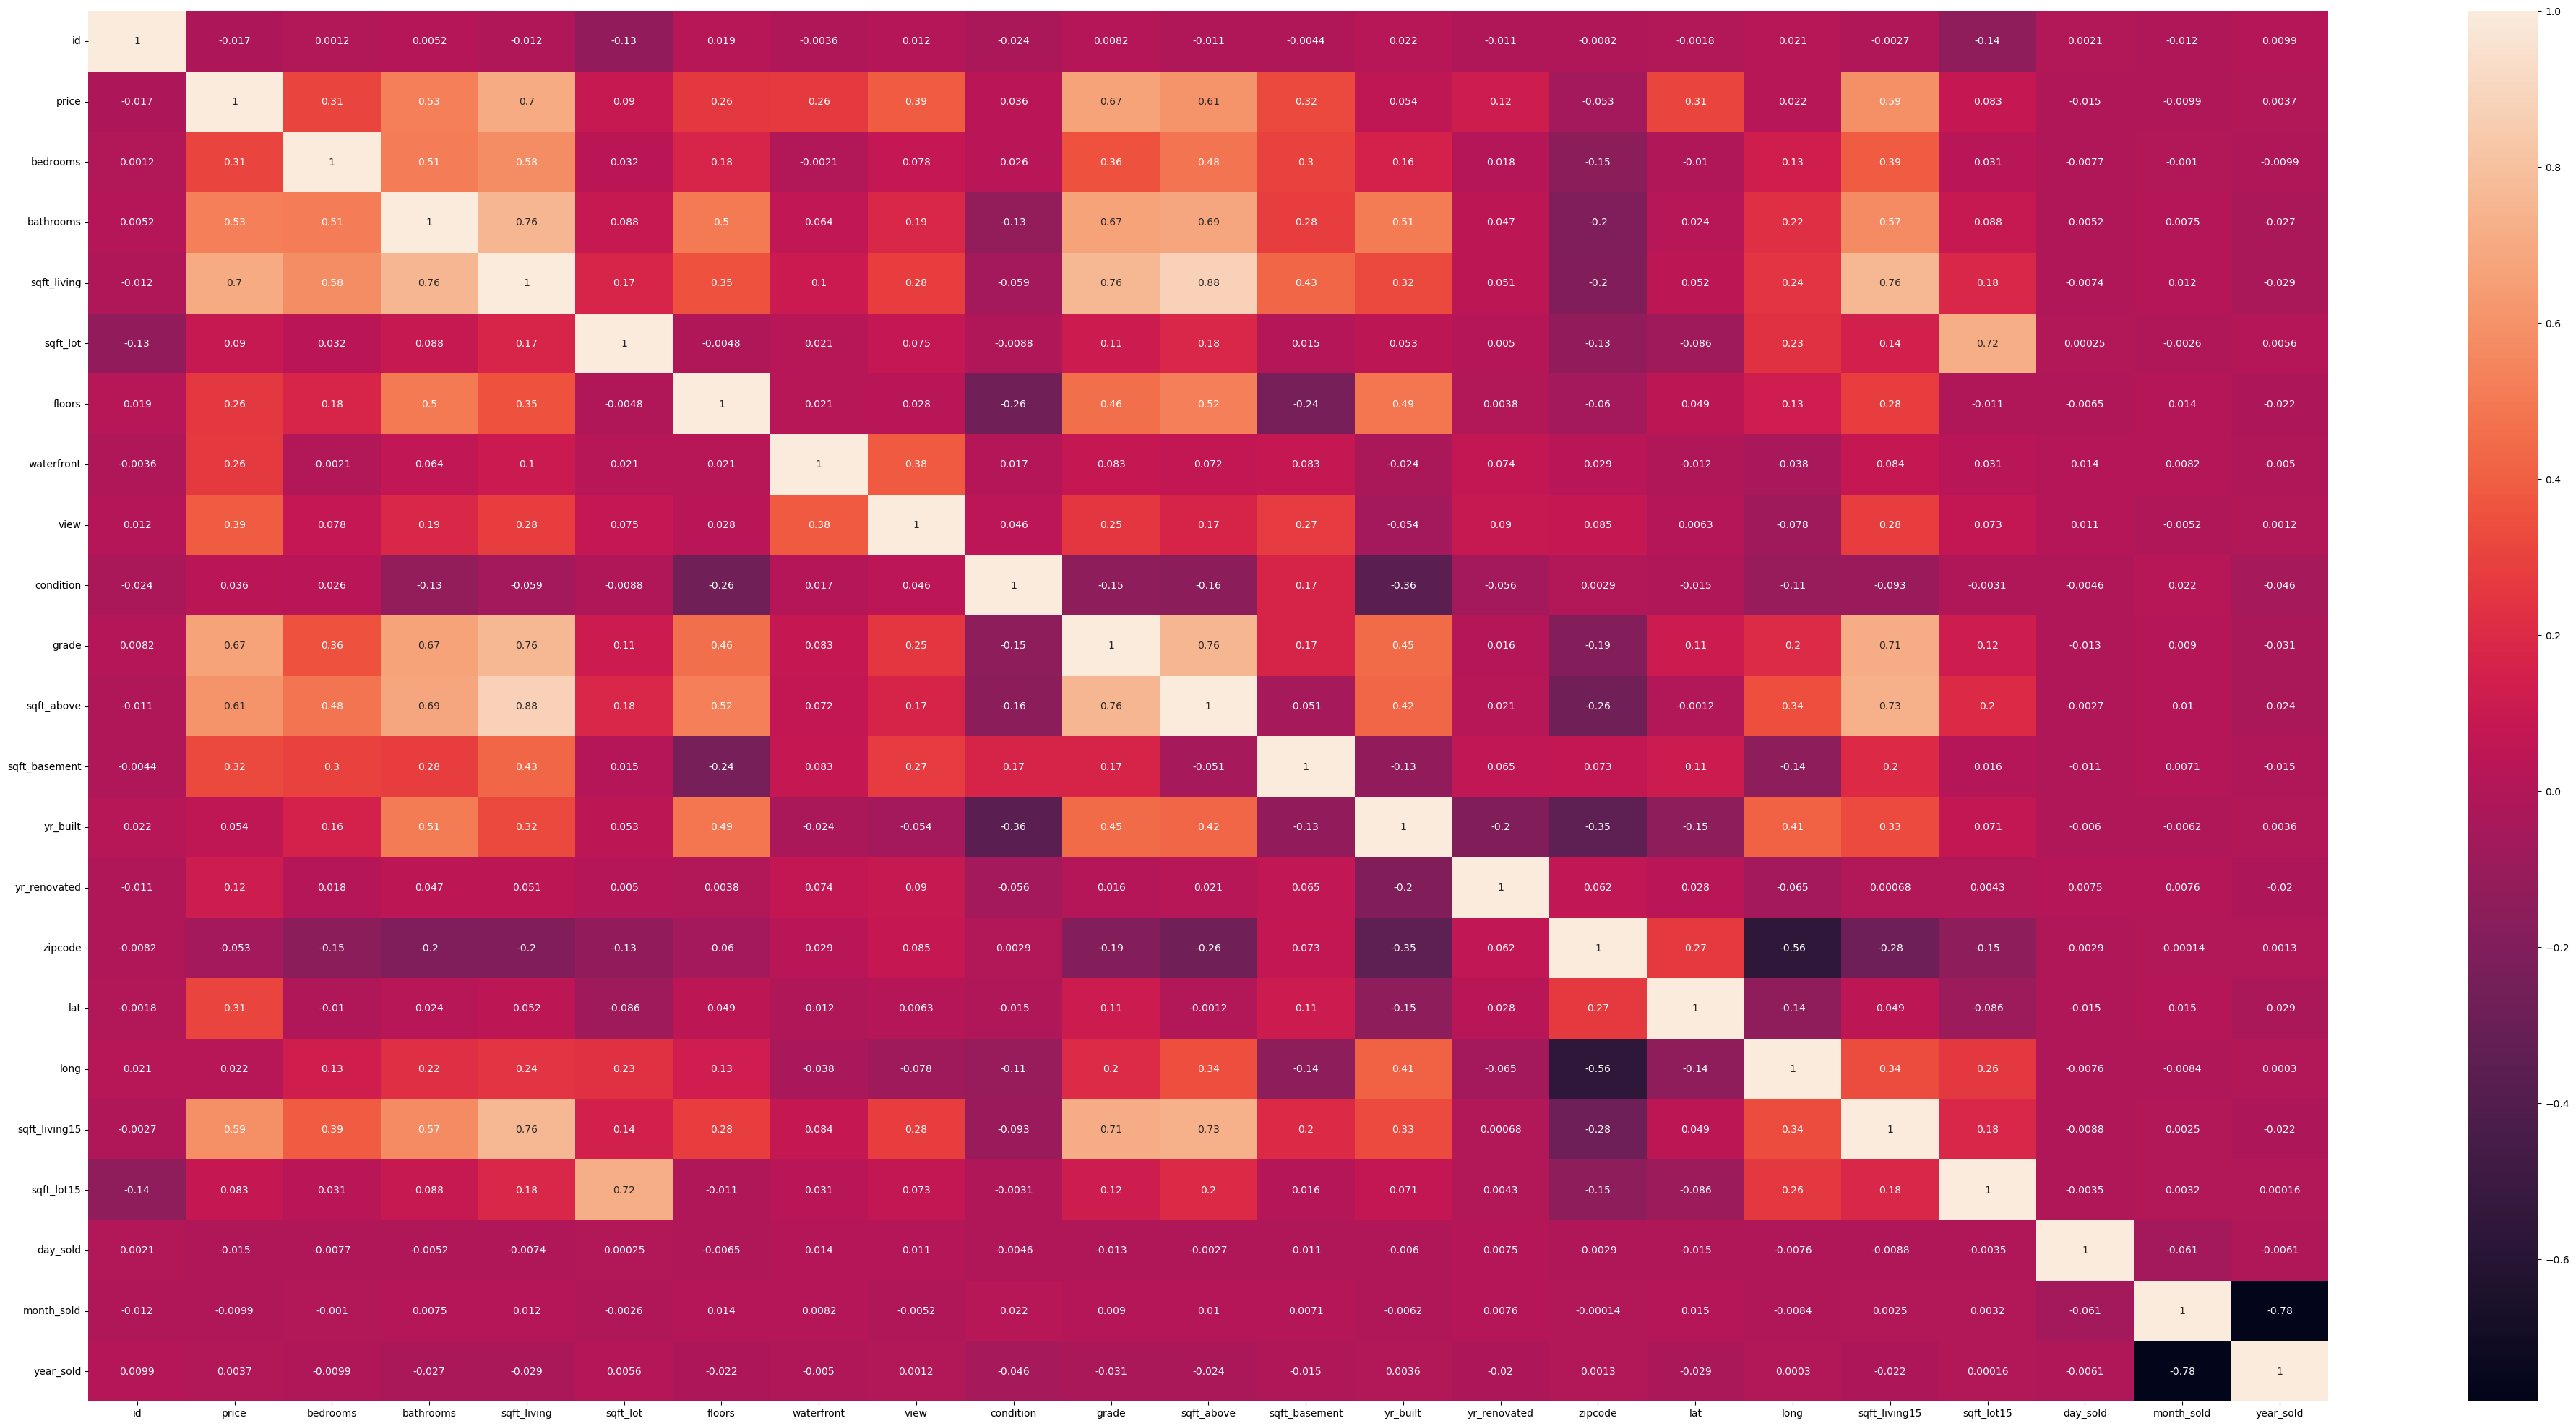

In [14]:
df.corr()
plt.figure(figsize=(50, 25))
sns.heatmap(data=df.corr(), annot=True);

The price and sqft_living columns in this instance exhibit the highest correlation, We'll build a straightforward model based on this for that.

In [15]:
formula_simple = 'price ~ sqft_living'
model = ols(formula=formula_simple, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Sat, 08 Jul 2023   Prob (F-statistic):               0.00
Time:                        00:53:33   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
x_simple= df[['sqft_living']]
y_simple= df['price']

x_train_simple, x_test_simple, y_train_simple, y_test_simple = train_test_split(x_simple, y_simple, random_state=100)

lr=LinearRegression()
lr.fit(x_train_simple, y_train_simple)

error = lr.predict(x_test_simple)-y_test_simple
sq_of_err=(error)**2
mean_sqr_of_errors=sq_of_err.mean()
sqr_mean_sqr_errors= np.sqrt(mean_sqr_of_errors)

print("Our R-squared on the testing set is:", lr.score(x_test_simple, y_test_simple))
print("Our R-squared on the training set is:", lr.score(x_train_simple, y_train_simple))
print('This is the RMSE:', sqr_mean_sqr_errors)

Our R-squared on the testing set is: 0.48733518973535617
Our R-squared on the training set is: 0.4945445156766466
This is the RMSE: 279487.2162346182


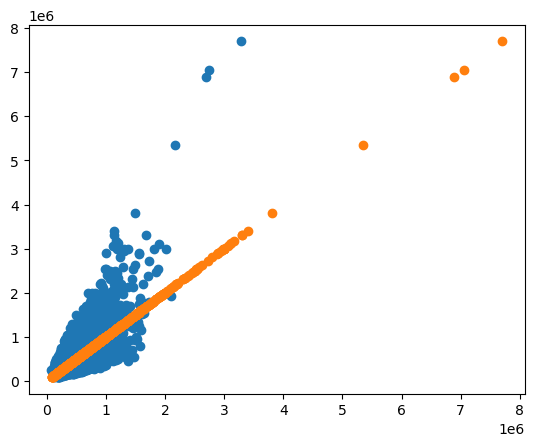

In [18]:
ypred = lr.predict(x_test_simple)
plt.scatter((ypred) , (y_test_simple))
plt.scatter((y_test_simple),(y_test_simple));

As we can see, our simple model has substantially improved over our baseline model, but we are still not content or comfortable making recommendations based on this data. It's time to take a fresh strategy by examining all values and determining which have the most influence on price.

## The process of identifying statistically significant values

In [19]:
outcome = 'price'
predictors = df.drop(['price'], axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     2308.
Date:                Sat, 08 Jul 2023   Prob (F-statistic):               0.00
Time:                        00:59:46   Log-Likelihood:            -2.9432e+05
No. Observations:               21597   AIC:                         5.887e+05
Df Residuals:                   21574   BIC:                         5.889e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6.682e+07   9.97e+06     -6.701      0.000   -8.64e+07   -4.73e+07
id            -1.348e-06   4.81e-07     -2.801      0.005   -2.29e-06   -4.05e-07
bedrooms      -3.611e+04   1895.453    -19.050      0.000   -3.98e+04   -3.24e+04
bathrooms      4.185e+04   3253.776     12.862      0.000    3.55e+04    4.82e+04
sqft_living     103.7644     18.027      5.756      0.000      68.431     139.098
sqft_lot          0.1177      0.048      2.459      0.014       0.024       0.211
floors         7644.5741   3591.351      2.129      0.033     605.261    1.47e+04
waterfront     6.188e+05   1.81e+04     34.212      0.000    5.83e+05    6.54e+05
view           5.316e+04   2117.328     25.109      0.000     4.9e+04    5.73e+04
condition      2.807e+04   2344.433     11.971      0.000    2.35e+04    3.27e+04
grade          9.726e+04   2155.477     45.122      0.000     9.3e+04    1.01e+05
sqft_above       77.0668     18.018      4.277      0.000      41.750     112.383
sqft_basement    46.9048     17.858      2.627      0.009      11.902      81.908
yr_built      -2639.9001     71.732    -36.802      0.000   -2780.500   -2499.300
yr_renovated     24.4748      3.968      6.169      0.000      16.698      32.252
zipcode        -584.8168     32.901    -17.775      0.000    -649.306    -520.328
lat            6.027e+05   1.07e+04     56.260      0.000    5.82e+05    6.24e+05
long          -2.156e+05   1.31e+04    -16.405      0.000   -2.41e+05    -1.9e+05
sqft_living15    21.5470      3.441      6.262      0.000      14.802      28.292
sqft_lot15       -0.4007      0.073     -5.464      0.000      -0.544      -0.257
day_sold       -360.8721    159.163     -2.267      0.023    -672.843     -48.902
month_sold     1130.0414    708.768      1.594      0.111    -259.197    2519.280
year_sold      3.657e+04   4721.636      7.746      0.000    2.73e+04    4.58e+04
==============================================================================
Omnibus:                    18405.094   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1877386.440
Skew:                           3.576   Prob(JB):                         0.00
Kurtosis:                      48.112   Cond. No.                     3.95e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.95e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
lr = LinearRegression()

lr.fit(X_train, y_train)
print("Our R-squared on the testing set is:", lr.score(X_test, y_test))
print("Our R-squared on the training set is:", lr.score(X_train, y_train))

Our R-squared on the testing set is: 0.686635461929135
Our R-squared on the training set is: 0.706998573878783


In [21]:
y_pred = lr.predict(X_test)
error=y_pred-y_test
sq_of_err=(error)**2
mean_sqr_of_errors=sq_of_err.mean()
print(mean_sqr_of_errors)
sqr_mean_sqr_errors= np.sqrt(mean_sqr_of_errors)
print(sqr_mean_sqr_errors)

47746356438.41847
218509.3966821987


We can tell right away that this model is superior than our original, simpler model. Although several of these components do not meet the requirements of our linear regression, it still has a very big error. 

The following stage would be to focus on variables that, first and foremost, have a linear relationship with price, and then verify that all of the presumptions are true. In order to prevent our model from overfitting, it also makes sense to eliminate the greatest outliers.


## Removing Outliers

To eliminate any outliers in our data collection, we decided to utilise two standard deviations from the mean. Given how linear regression perceives outliers and the severely negative influence they can have on the results, we concluded that looking at the bedrooms and sqft_living columns would be the best way to remove these types of data points.
The ideal method here was to delete any data points that were more than two standard deviations apart. This would provide us with 95% of the data around the mean. We feel that doing so will provide us with a better set and enable our linear regression model to perform better.



In [22]:
print("Our data before removing outliers: ", df['bedrooms'].describe())
print("Our data before removing outliers: ", df['sqft_living'].describe())

df = df [df['bedrooms'] < 5.226884]
df = df [df['bedrooms'] > 1.52]


df = df[df['sqft_living'] < 3916.2]
df = df[df['sqft_living'] > 244.2]
print("Our data after removing outliers: ", df['bedrooms'].describe())
print("Our data after removing outliers: ", df['sqft_living'].describe())

Our data before removing outliers:  count    21597.000000
mean         3.373200
std          0.926299
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64
Our data before removing outliers:  count    21597.000000
mean      2080.321850
std        918.106125
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64
Our data after removing outliers:  count    20259.000000
mean         3.312009
std          0.785984
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: bedrooms, dtype: float64
Our data after removing outliers:  count    20259.000000
mean      1967.846241
std        721.339687
min        440.000000
25%       1410.000000
50%       1870.000000
75%       2440.000000
max       3915.000000
Name: sqft_living, dtype: float64


## Examining the relationship between price and independent variables for linearity


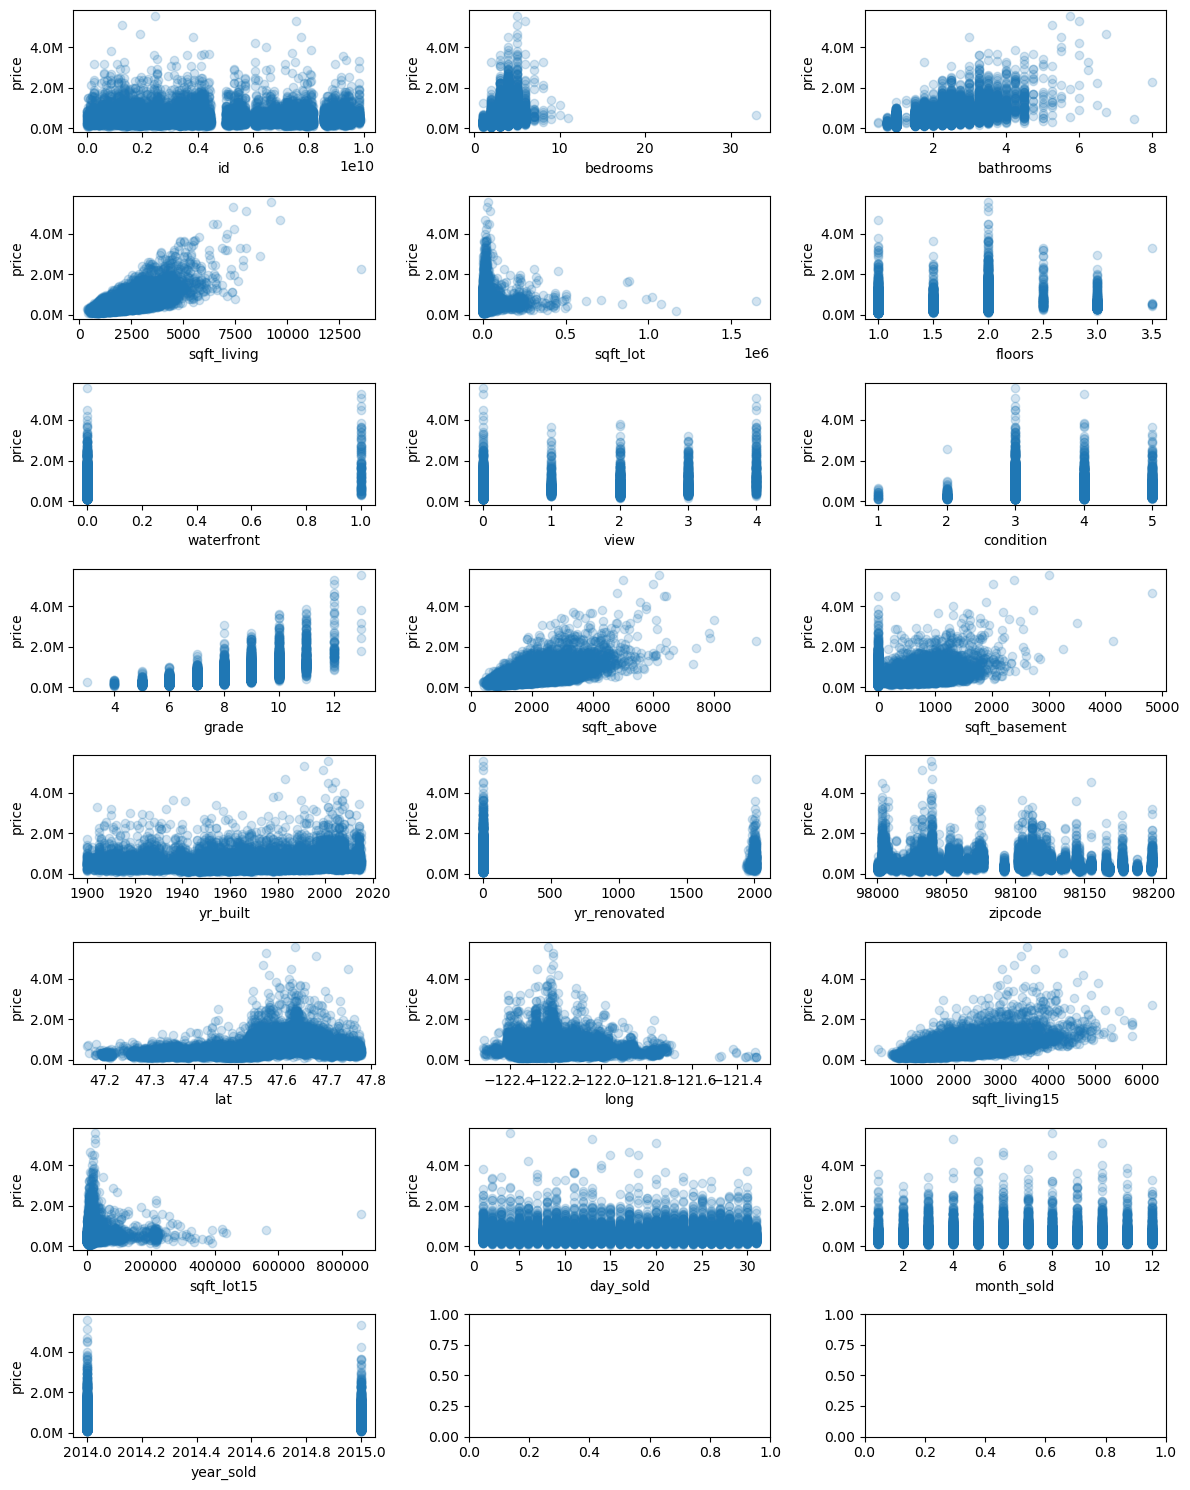

In [23]:
# Used in converting x and y axis ticks.

def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

formatter = FuncFormatter(millions)

fig, axes = plt.subplots(ncols=3, nrows=8, figsize=(12, 15))
fig.set_tight_layout(True)

for index, col in enumerate(X_train.columns):
    ax = axes[index//3][index%3]
    ax.yaxis.set_major_formatter(formatter)
    ax.scatter(X_train[col], y_train, alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("price")

The graphs above show that the following variables have a linear connection with price.
* sqft_living15
* grade
* sqft_above
* sqft_living
* bathrooms

We can disregard the remaining columns because they do not adhere to one of the assumptions required for linear regression.


In [24]:
linear_df = df[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'price']]
linear_df

,sqft_living,grade,sqft_above,sqft_living15,bathrooms,price
0,1180,7,1180,1340,1.00,221900.0
1,2570,7,2170,1690,2.25,538000.0
2,770,6,770,2720,1.00,180000.0
3,1960,7,1050,1360,3.00,604000.0
4,1680,8,1680,1800,2.00,510000.0
...,...,...,...,...,...,...
21592,1530,8,1530,1530,2.50,360000.0
21593,2310,8,2310,1830,2.50,400000.0
21594,1020,7,1020,1020,0.75,402101.0
21595,1600,8,1600,1410,2.50,400000.0


 ### Checking for Collinearity

In [25]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

corr_df=linear_df.drop('price', axis=1).corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
corr_df['pairs'] = list(zip(corr_df.level_0, corr_df.level_1))

# set index to pairs
corr_df.set_index(['pairs'], inplace = True)

#d rop level columns
corr_df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
corr_df.columns = ['cc4']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
corr_df.drop_duplicates(inplace=True)
corr_df[(corr_df.cc4>.75) & (corr_df.cc4 <1)]

,cc4
pairs,
"(sqft_living, sqft_above)",0.838949


It appears that all we need to do is remove sqft_above to get variables that are linear with price and not correlated to one another.



In [26]:

non_colin_df = linear_df.drop(['sqft_above'], axis=1)

Let's evaluate how stronly correlated our final variables are to price after removing outliers. 


In [27]:
keys = list(non_colin_df.corr()['price'].sort_values(ascending=False).index)
keys[1] = 'Construction Grade'
keys[2] = 'Square Footage'
keys[3] = 'Surrounding Homes Size'
keys[4] = 'Bathrooms'
values = list(non_colin_df.corr()['price'].sort_values(ascending=False))

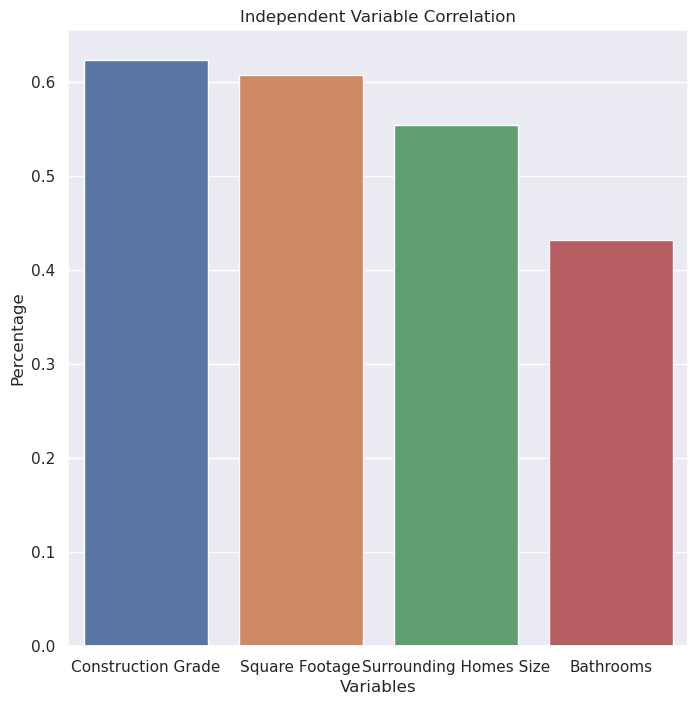

In [28]:
sns.set(rc = {'figure.figsize':(8,8)})
sns.barplot(x=keys[1:], y=values[1:]).set(title='Independent Variable Correlation', xlabel='Variables', ylabel='Percentage');


## Inferential Model

In [29]:
X2 = non_colin_df.drop('price', axis=1)
y2 = non_colin_df['price']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, random_state=100)

outcome = 'price'
predictors = X2_train
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
inferntial_model = ols(formula=formula, data=non_colin_df).fit()
inferntial_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     4192.
Date:                Sat, 08 Jul 2023   Prob (F-statistic):               0.00
Time:                        01:19:51   Log-Likelihood:            -2.7576e+05
No. Observations:               20259   AIC:                         5.515e+05
Df Residuals:                   20254   BIC:                         5.516e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4.895e+05   1.13e+04    -43.235      0.000   -5.12e+05   -4.67e+05
sqft_living     114.6699      3.548     32.322      0.000     107.716     121.624
grade          9.594e+04   2047.342     46.860      0.000    9.19e+04       1e+05
sqft_living15    50.9156      3.543     14.370      0.000      43.971      57.860
bathrooms     -2.903e+04   2933.636     -9.895      0.000   -3.48e+04   -2.33e+04
==============================================================================
Omnibus:                     8447.483   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            67836.729
Skew:                           1.807   Prob(JB):                         0.00
Kurtosis:                      11.204   Cond. No.                     2.39e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

According to the model's coefficients, a home's sale price will typically rise by 114 dollars for every additional square foot that is added. We anticipate a price increase of 51 dollars per additional square foot when the average square footage of the 15 nearby neighbours rises.


Interesting enough, there is a negative link with bathrooms. The model may be trying to determine how bathrooms affect price because it accounts for square footage and it's a huge house, which may be the rationale for this. In that situation, it's plausible that larger, more costly homes don't cost more simply because they have more bathrooms.

Because grade is not a continuous variable, we cannot accept the coefficient that appears in our model as an actual value.

Instead, divide the data into three categories: below-average, average, and above-average. Let's look at the average pricing in each section.


In [30]:
low_grade_df = non_colin_df[non_colin_df['grade']<6]
average_grade_df = non_colin_df[(non_colin_df['grade']>5) & (non_colin_df['grade']<9)]
high_grade_df = non_colin_df[non_colin_df['grade']>8]

low_average = low_grade_df['price'].mean()
print(low_average)
average_average = average_grade_df['price'].mean()
print(average_average)
high_average = high_grade_df['price'].mean()
print(high_average)

245176.64055299538
437880.26031345705
823880.8681026852


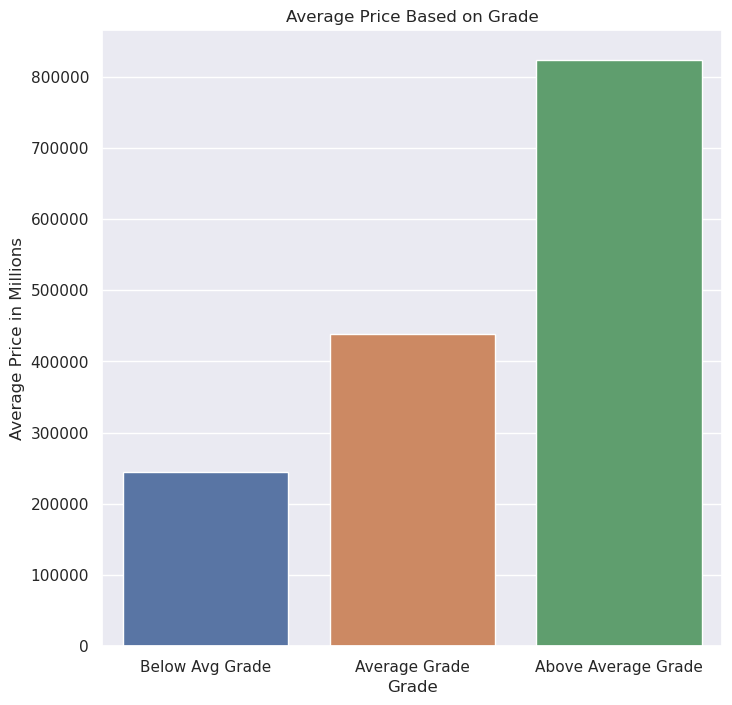

In [31]:
grade_values = [low_average, average_average, high_average]
grade_keys = ['Below Avg Grade', 'Average Grade', 'Above Average Grade']
sns.set(rc = {'figure.figsize':(8,8)})
sns.barplot(x=grade_keys, y=grade_values).set(title='Average Price Based on Grade', xlabel='Grade', ylabel='Average Price in Millions');

In terms of inference, we can say that adding square footage to your home will add 115 dollars per square foot, increasing the average size of surrounding homes will add 50 dollars per square foot, and having an above-average construction grade is correlated with an average price of nearly a million dollars! 

We'll now work on getting the most accurate prediction possible.

## Standard Scaling the Data

In [32]:
non_colin_df_4 = non_colin_df.drop('price', axis=1)
price_df = non_colin_df['price']

#create standard scaler
ss = StandardScaler()
ss.fit(non_colin_df_4)

stand_scale = ss.transform(non_colin_df_4)

scaled_df_noncolin = pd.DataFrame(stand_scale, columns=non_colin_df_4.columns)

scaled_df_noncolin.reset_index(drop=True, inplace=True)
scaled_df_noncolin.reset_index(drop=True, inplace=True)
price_df.reset_index(drop=True, inplace=True)
price_df.reset_index(drop=True, inplace=True)

scaled_data = pd.concat((price_df, scaled_df_noncolin), axis=1)
scaled_data

,price,sqft_living,grade,sqft_living15,bathrooms
0,221900.0,-1.092226,-0.542506,-0.968677,-1.535441
1,538000.0,0.834792,-0.542506,-0.394522,0.291795
2,180000.0,-1.660627,-1.507867,1.295137,-1.535441
3,604000.0,-0.010878,-0.542506,-0.935869,1.388137
4,510000.0,-0.399054,0.422855,-0.214073,-0.073652
...,...,...,...,...,...
20254,360000.0,-0.607005,0.422855,-0.656993,0.657242
20255,400000.0,0.474343,0.422855,-0.164859,0.657242
20256,402101.0,-1.314041,-0.542506,-1.493620,-1.900888
20257,400000.0,-0.509961,0.422855,-0.853846,0.657242


## Model after Standard Scaling

In [33]:
X3 = scaled_data.drop('price', axis=1)
y3 = scaled_data['price']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y3, random_state=100)

outcome = 'price'
predictors = X3_train
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
final_model = ols(formula=formula, data=scaled_data).fit()
final_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     4192.
Date:                Sat, 08 Jul 2023   Prob (F-statistic):               0.00
Time:                        01:30:03   Log-Likelihood:            -2.7576e+05
No. Observations:               20259   AIC:                         5.515e+05
Df Residuals:                   20254   BIC:                         5.516e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.004e+05   1386.737    360.838      0.000    4.98e+05    5.03e+05
sqft_living    8.271e+04   2559.060     32.322      0.000    7.77e+04    8.77e+04
grade          9.938e+04   2120.804     46.860      0.000    9.52e+04    1.04e+05
sqft_living15  3.104e+04   2159.855     14.370      0.000    2.68e+04    3.53e+04
bathrooms     -1.986e+04   2006.881     -9.895      0.000   -2.38e+04   -1.59e+04
==============================================================================
Omnibus:                     8447.483   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            67836.729
Skew:                           1.807   Prob(JB):                         0.00
Kurtosis:                      11.204   Cond. No.                         3.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

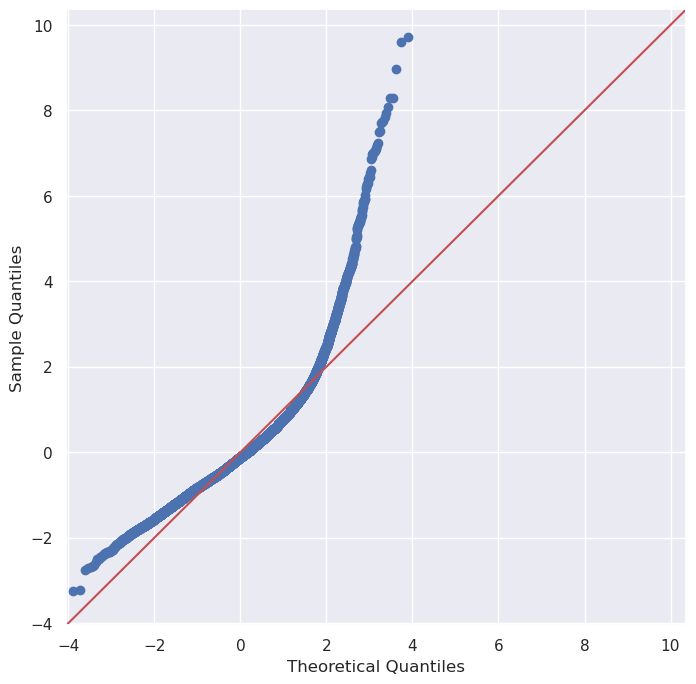

In [34]:
## Creating a QQ Plot

resid = final_model.resid
sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True);

In [35]:
lr = LinearRegression()
lr.fit(X3_train, y3_train)
print('The training set score is :', lr.score(X3_train, y3_train))
print('The test set score is :', lr.score(X3_test, y3_test))

The training set score is : 0.4534028549702447
The test set score is : 0.4511600877483033


In [36]:
error = lr.predict(X3_test)-y3_test
sq_of_err=(error)**2
mean_sqr_of_errors=sq_of_err.mean()
print(mean_sqr_of_errors)
sqr_mean_sqr_errors= np.sqrt(mean_sqr_of_errors)
print(sqr_mean_sqr_errors)

37656664856.4354
194053.25263039372


eval_env: 1


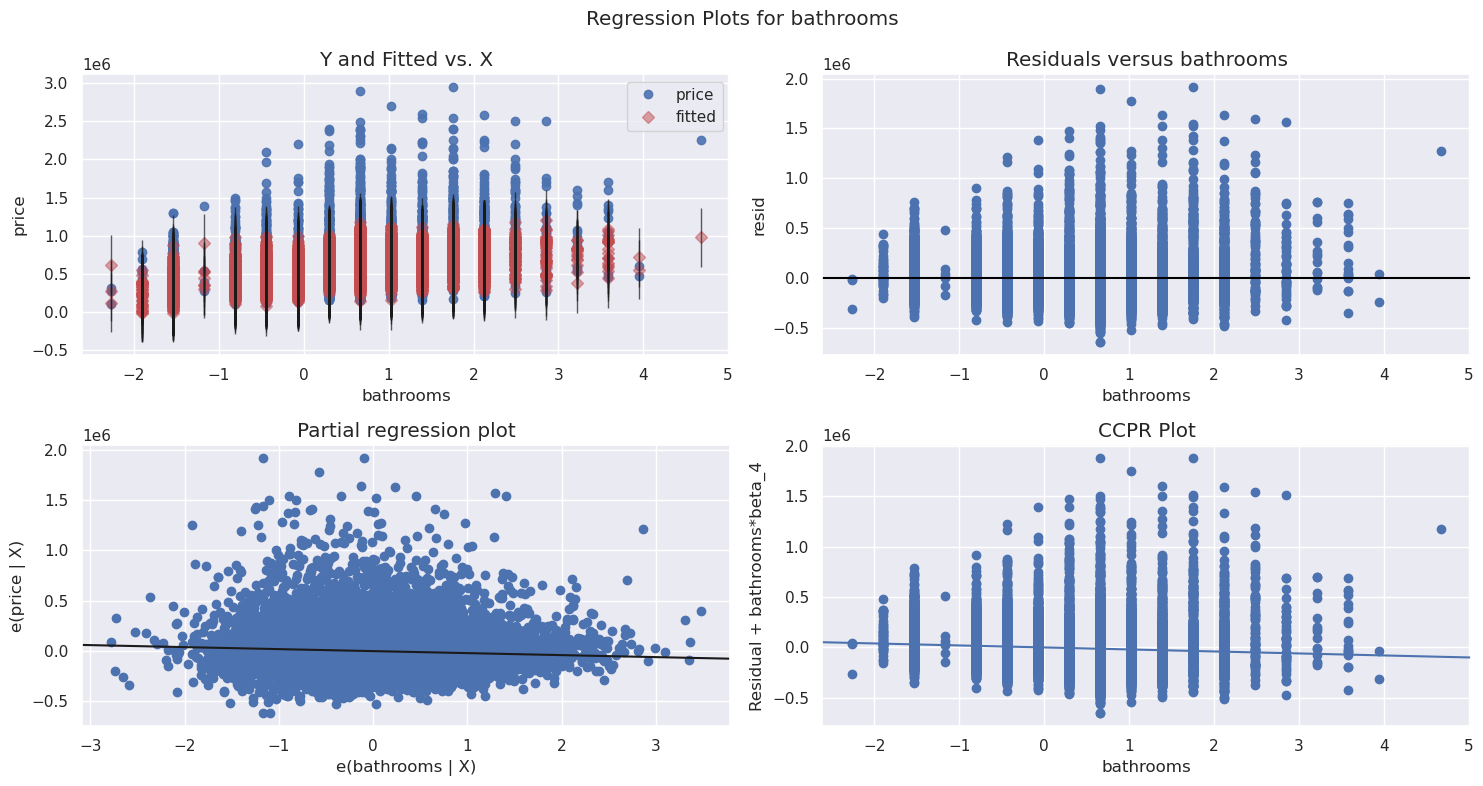

In [37]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(final_model, "bathrooms", fig=fig)
plt.show()

eval_env: 1


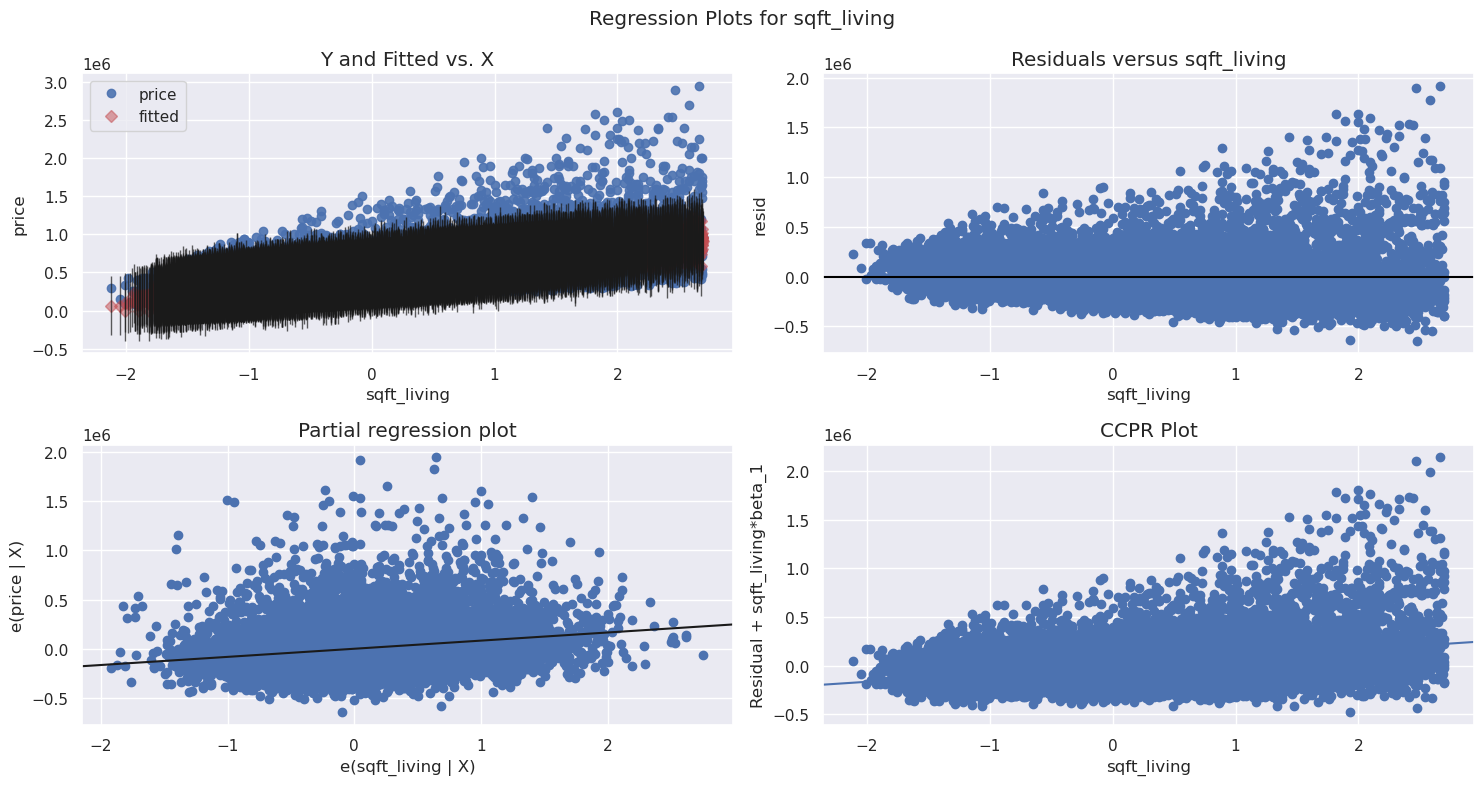

In [38]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(final_model, "sqft_living", fig=fig)
plt.show()

eval_env: 1


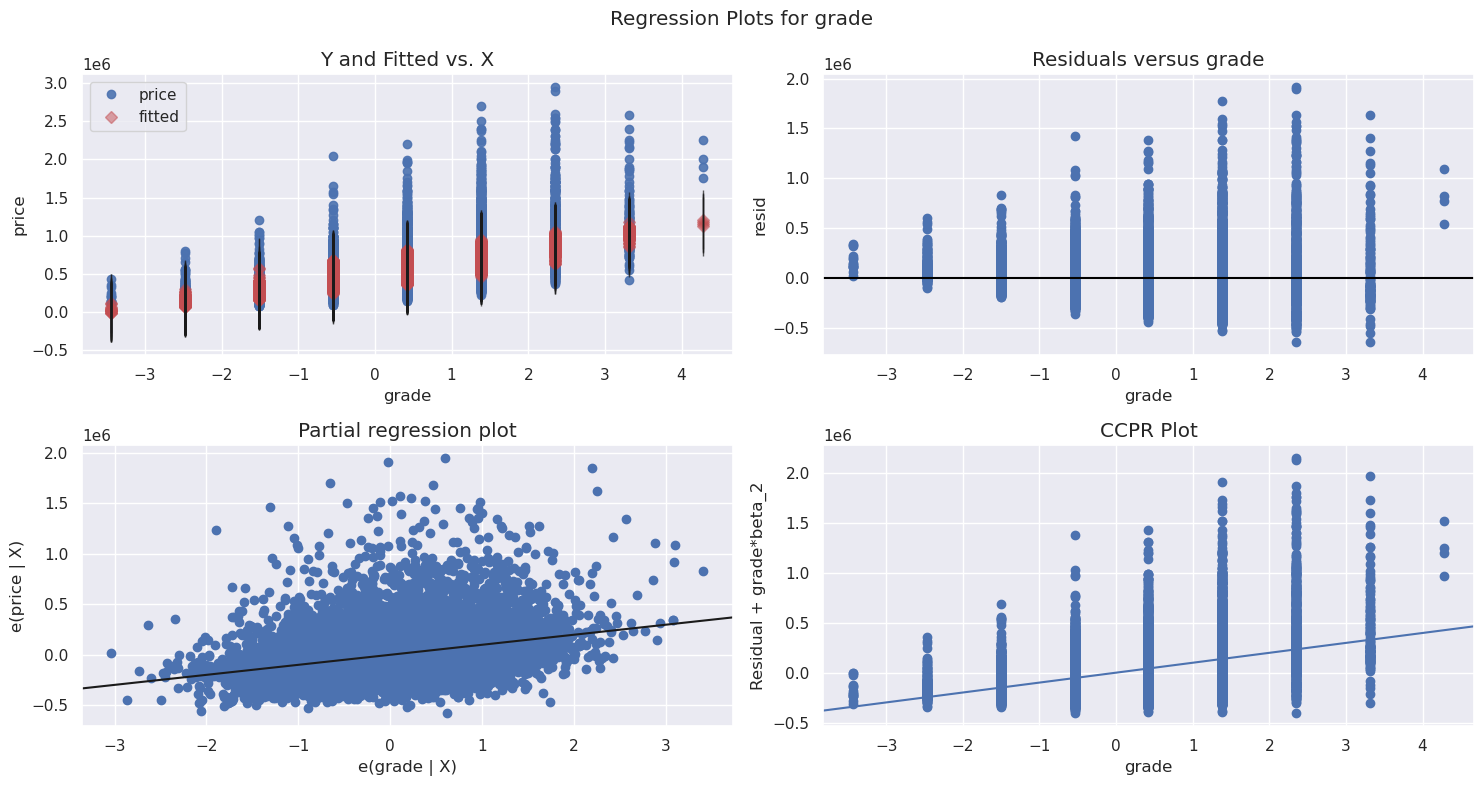

In [39]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(final_model, "grade", fig=fig)
plt.show()

eval_env: 1


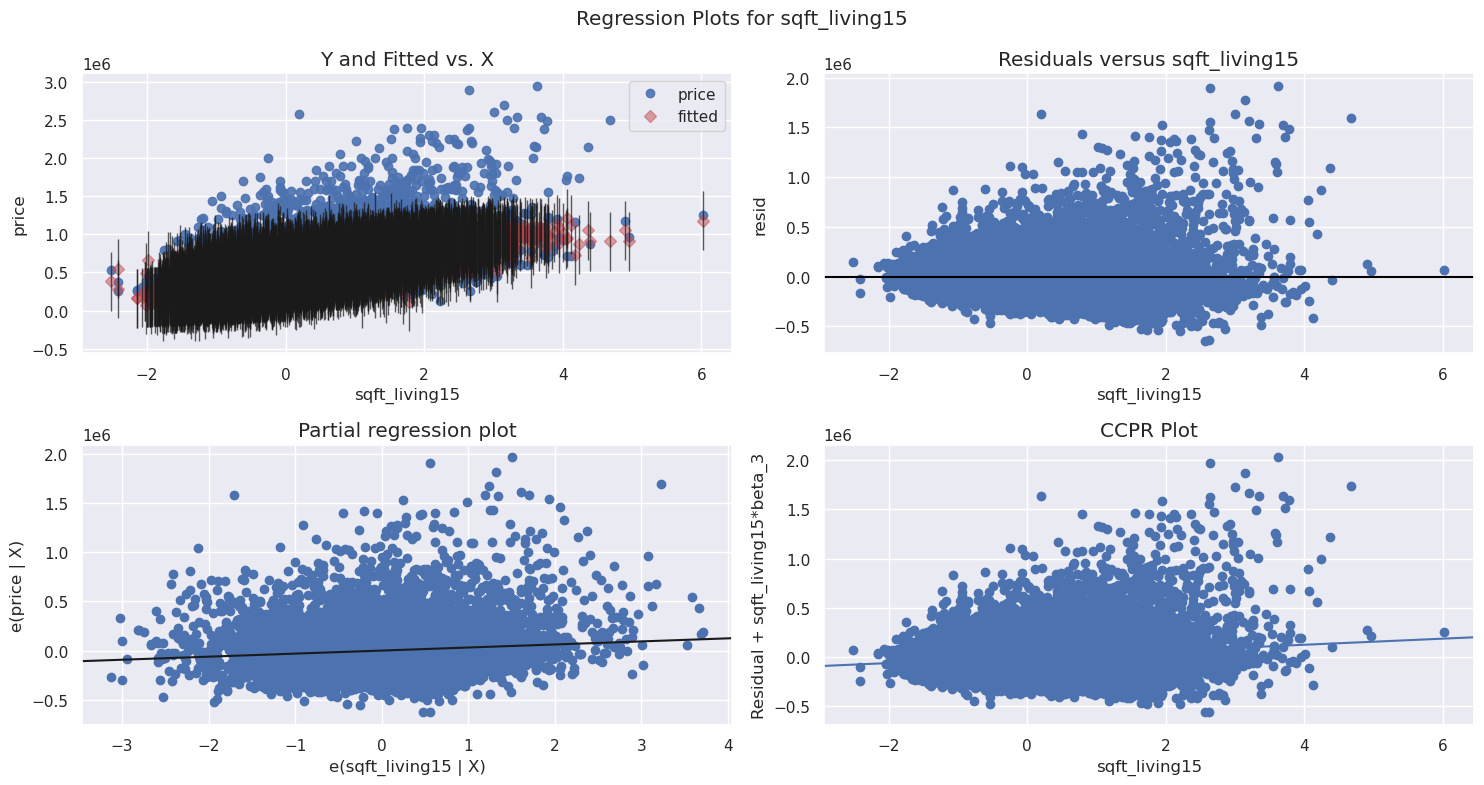

In [40]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(final_model, "sqft_living15", fig=fig)
plt.show()

This model isn't ideal because we're breaking a lot of linear regression assumptions. First and foremost, the QQ plot reveals that the error distribution is non-normal. We can also see that the residuals of the independent variables do not obey the assumption of homoscedasticity.


## FINAL WORKBOOK

Let's check if we can log our price and see whether the data is more normally scaled.



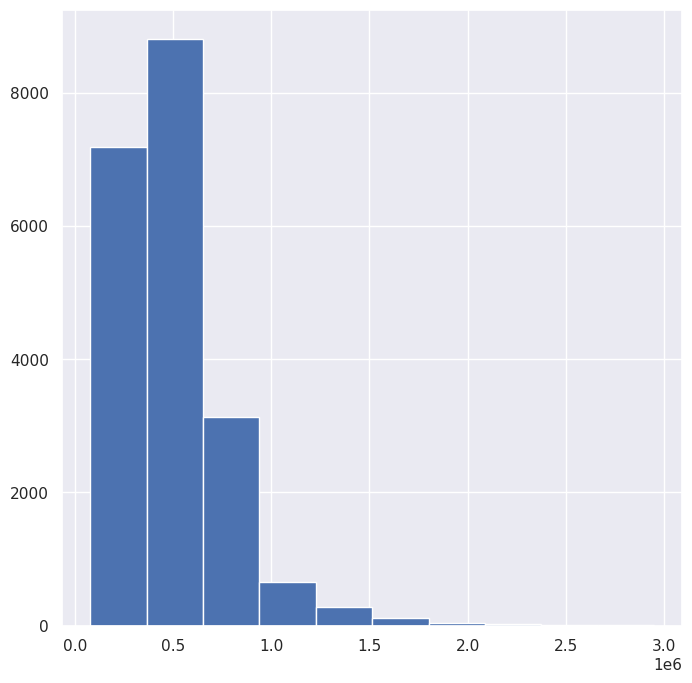

In [41]:
plt.hist(df['price']);

This graph clearly shows that this is NOT normally distributed, which will present a huge difficulty for our linear regression models. 


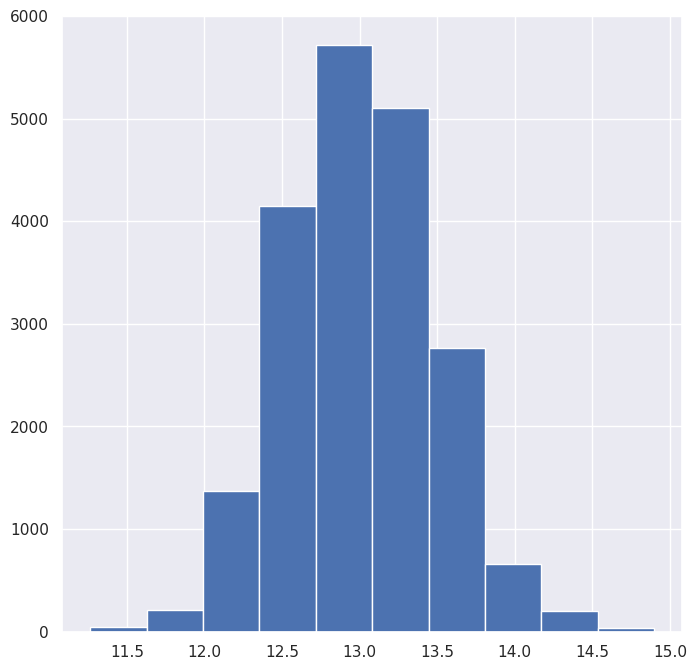

In [42]:
plt.hist(np.log(df['price']));

This is fantastic. Now we'll enter the price into our data frame and run our final model!!


In [43]:
# LOGGING PRICE

scaled_data['log_price'] = np.log(scaled_data['price'])

X4 = scaled_data.drop(['price','log_price'], axis=1)
y4 = scaled_data['log_price']
X4_train, X4_test, y4_train, y4_test = train_test_split(X4,y4, random_state=100)

outcome = 'log_price'
predictors = X4_train
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
final_model = ols(formula=formula, data=scaled_data).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     4629.
Date:                Sat, 08 Jul 2023   Prob (F-statistic):               0.00
Time:                        01:38:11   Log-Likelihood:                -7255.2
No. Observations:               20259   AIC:                         1.452e+04
Df Residuals:                   20254   BIC:                         1.456e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        13.0053      0.002   5346.654      0.000      13.001      13.010
sqft_living       0.1451      0.004     32.318      0.000       0.136       0.154
grade             0.1807      0.004     48.586      0.000       0.173       0.188
sqft_living15     0.0504      0.004     13.291      0.000       0.043       0.058
bathrooms        -0.0145      0.004     -4.123      0.000      -0.021      -0.008
==============================================================================
Omnibus:                       71.215   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.970
Skew:                           0.079   Prob(JB):                     5.76e-14
Kurtosis:                       2.782   Cond. No.                         3.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
lr.fit(X4_train, y4_train)
lr.score(X4_test, y4_test)

0.46881386283634763

In [45]:
lr.score(X4_train, y4_train)

0.48042049590982894

Unfortunately, our model did not perform as well as we would have expected given the difference between train and test, but let's look at the RMSE to see whether it has improved.

Let's go over the assumptions one more time to make sure this model is correct.


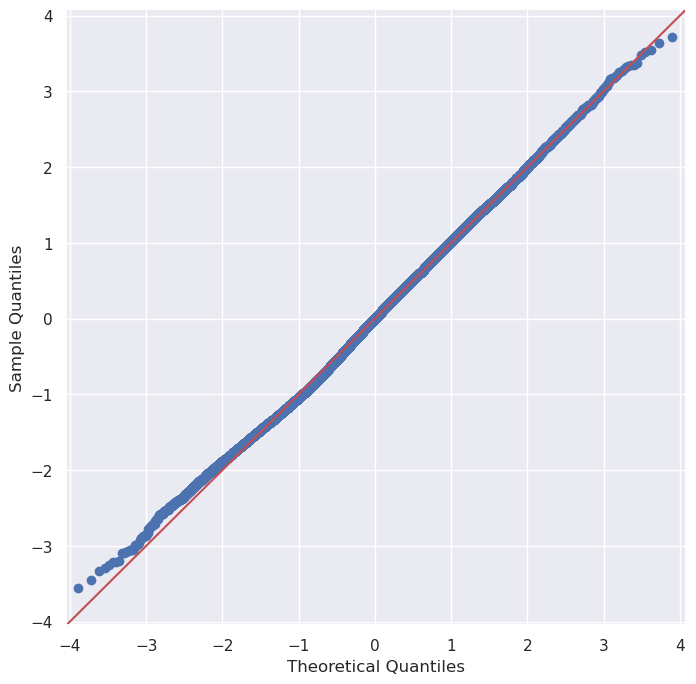

In [46]:
resid = final_model.resid
sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True);

eval_env: 1


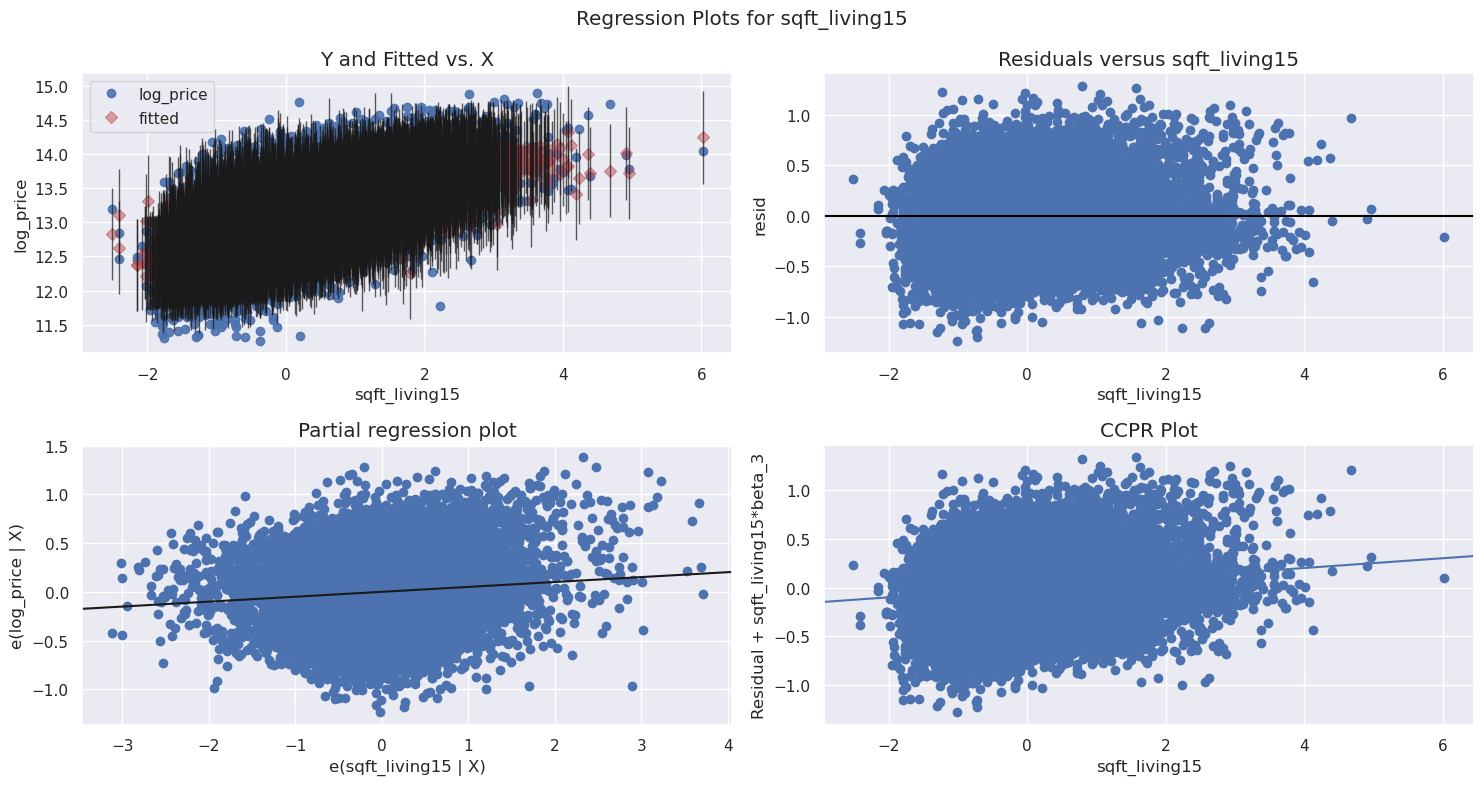

In [47]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(final_model, "sqft_living15", fig=fig)
plt.show()

eval_env: 1


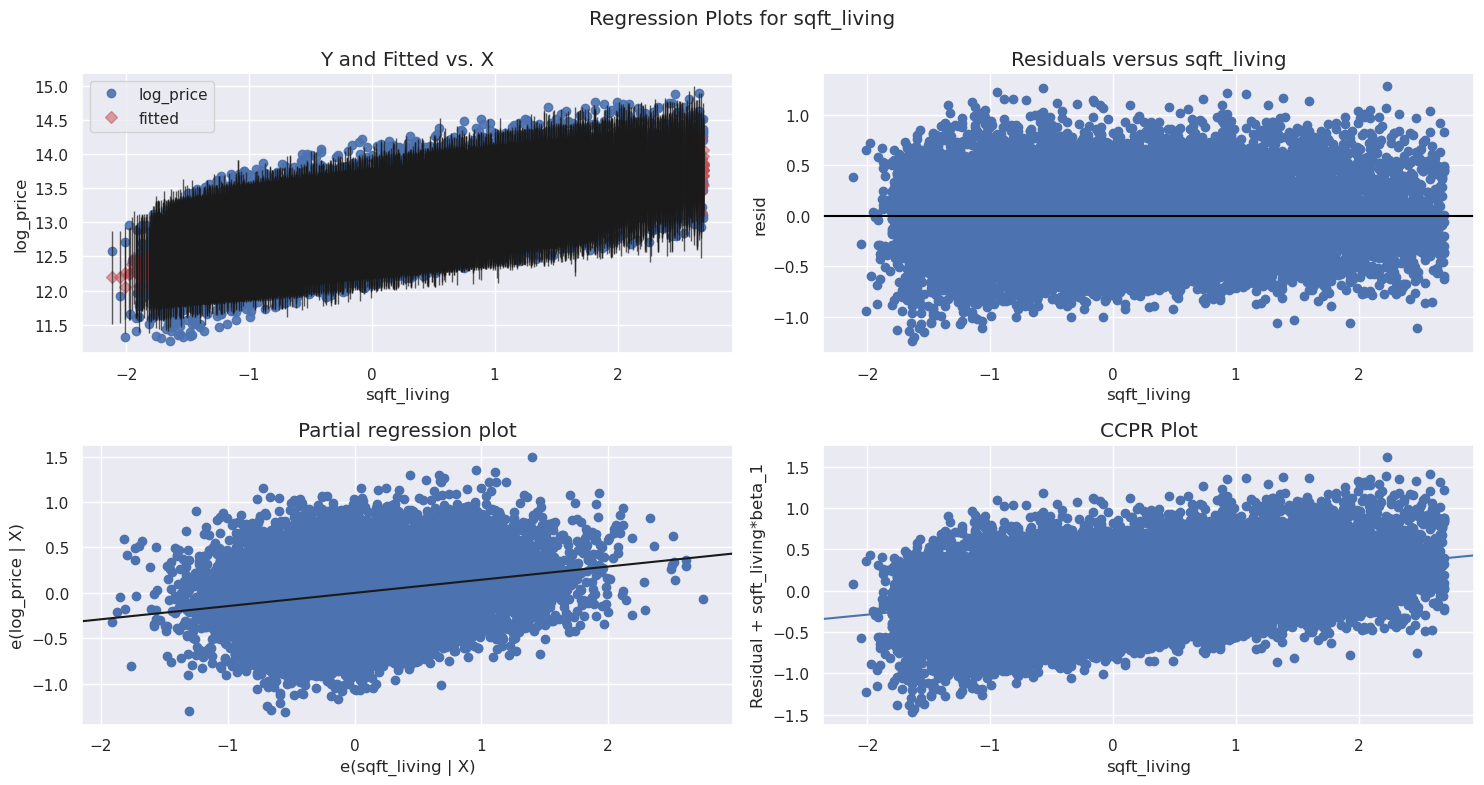

In [48]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(final_model, "sqft_living", fig=fig)
plt.show()

eval_env: 1


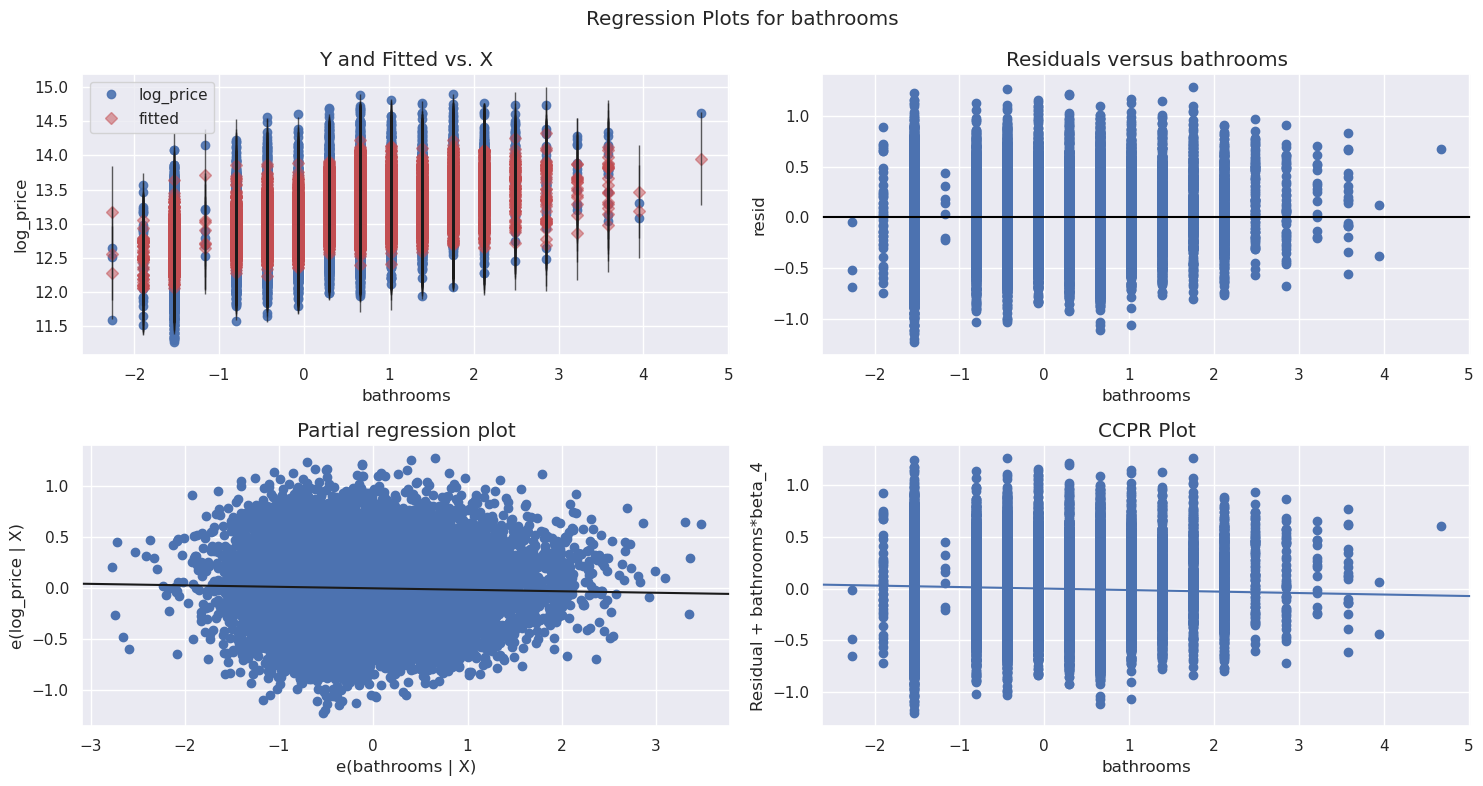

In [49]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(final_model, "bathrooms", fig=fig)
plt.show()

This is how we anticipate our final model will perform.  To satisfy the linear regression assumptions, we made these changes to the final model. According to the graphs above, the four independent variables are homoscedastic, which means that the variance does not increase as the independent variable increases or decreases. We also know from the correlation graph that these aren't collinear. 


This graph depicts the RMSE improvement as we modified each model!!


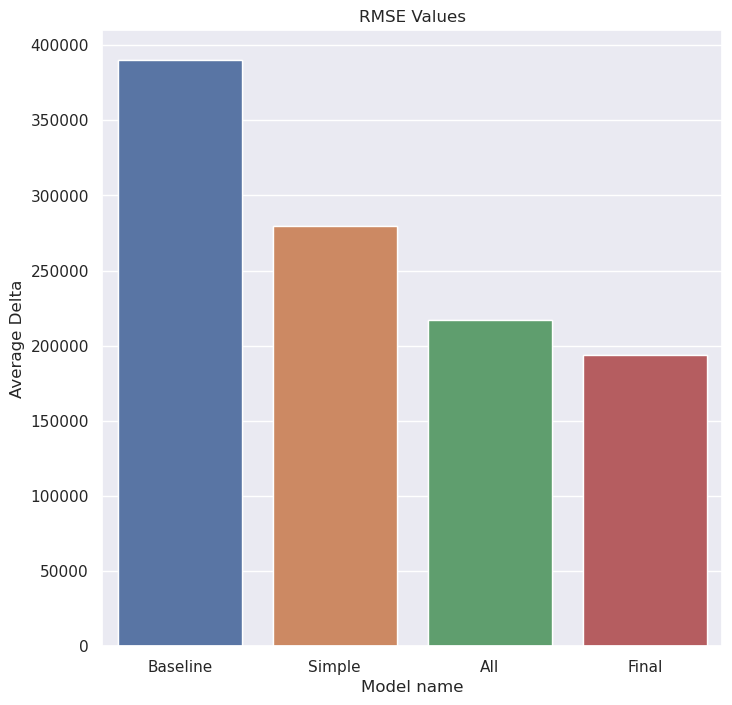

In [50]:
RMSE_values = [390395, 279487, 217267, 194053]
baseline_names =['Baseline', 'Simple', 'All', 'Final']


plt.bar(baseline_names, height=RMSE_values)
plt.title('RMSE Values')
plt.xlabel('Model name')
plt.ylabel('Average Delta')

sns.set(rc = {'figure.figsize':(8,8)})
sns.barplot(x=baseline_names, y=RMSE_values).set(title='RMSE Values', xlabel='Model name', ylabel='Average Delta');

## Conclusion

Based on our analysis of King County data, we have determined that the key factors contributing to an increase in property value are the square footage of the property and its grade. Grade refers to the classification based on the construction quality of a structure, which encompasses the materials used and the quality of workmanship. Properties with higher grades tend to have higher values, despite the higher cost of construction per unit of measurement. 

However, our final model has its limitations. The R^2 value of our model was 48%, indicating that only 48% of the variance in property value could be explained by the factors included. Additionally, the root mean square error (RMSE) of $194,053 suggests that our model's predictions deviate from the actual property values by an average of $194,053. 

It is evident that linear regression may not have been the most suitable tool for extracting the maximum accuracy from this dataset. In future iterations, we intend to explore more powerful machine learning techniques to improve the predictive capabilities of our model and achieve a higher level of accuracy.